In [5]:
from CFRalgorithm import TempleCFR
import numpy as np

iterations = 1000
experiments = 10

experiment_utilites = np.zeros((experiments, iterations, 3))
for experiment in range(experiments):
	k = TempleCFR(iterations, {}, {})
	utilities = k.cfr_iterations_external()
	experiment_utilites[experiment][:][:] = utilities

100%|██████████| 1000/1000 [00:38<00:00, 25.75it/s]


Average game value 0: -0.26331962425607053
Average game value 1: -0.30260679864814616
Average game value 2: -0.33476283362565346


100%|██████████| 1000/1000 [00:38<00:00, 25.76it/s]


Average game value 0: -0.1948270752578369
Average game value 1: -0.323145125171818
Average game value 2: -0.3719389049911678


100%|██████████| 1000/1000 [00:40<00:00, 25.00it/s]


Average game value 0: -0.2177289081948871
Average game value 1: -0.2934899672786476
Average game value 2: -0.4593389482053667


100%|██████████| 1000/1000 [00:43<00:00, 22.81it/s]


Average game value 0: -0.24560622947094066
Average game value 1: -0.3820479187791681
Average game value 2: -0.34053919399190374


100%|██████████| 1000/1000 [00:43<00:00, 23.14it/s]


Average game value 0: -0.14139616497420132
Average game value 1: -0.3904975329872889
Average game value 2: -0.3796654305197443


100%|██████████| 1000/1000 [00:42<00:00, 23.63it/s]


Average game value 0: -0.18513172628101165
Average game value 1: -0.37573727427807946
Average game value 2: -0.41277003991937805


100%|██████████| 1000/1000 [00:38<00:00, 25.88it/s]


Average game value 0: -0.30053613300046017
Average game value 1: -0.3438729357672727
Average game value 2: -0.22349586244889744


 18%|█▊        | 184/1000 [00:07<00:34, 23.59it/s]


KeyboardInterrupt: 

In [ ]:
len(k.nodes) 

90606

In [ ]:
for node in k.nodes:
    if k.nodes[node].get_average_strategy()[0]!=.5:
        print(node)
        print("regret_sum",k.nodes[node].regret_sum)
        print("strategy",k.nodes[node].get_strategy())
        print("strategy sum",k.nodes[node].strategy_sum)    
        print("average strategy",k.nodes[node].get_average_strategy())

P:0,R:defender,C:GoldEmptyEmptyGameInits->(P:0
regret_sum [1.91540715e-18 1.72225081e-22 1.38180515e-18 9.76215612e-23
 2.65774709e-18 1.71865108e-22 1.91548512e-18 3.53896485e-23
 1.90056208e-18]
strategy [1.96020094e-01 1.76252743e-05 1.41412010e-01 9.99045430e-06
 2.71990127e-01 1.75884352e-05 1.96028073e-01 3.62172722e-06
 1.94500870e-01]
strategy sum [9.74809476e-32 1.81570548e-31 6.18407793e-32 6.55876156e-33
 2.73233767e-32 1.18191570e-31 1.42880708e-31 4.52664477e-32
 7.70886314e-33]
average strategy [0.14151834 0.26359574 0.08977759 0.00952171 0.03966682 0.17158507
 0.20742762 0.06571574 0.01119137]
P:1,R:attacker,C:GoldGoldFireGameInits->(P:0,A:(0, 0))->(P:1
regret_sum [0.]
strategy [1.]
strategy sum [852.65625]
average strategy [1.]
P:2,R:attacker,C:FireEmptyEmptyGameInits->(P:0,A:(0, 0))->(P:1,A:(1, 2))->(P:2
regret_sum [0.]
strategy [1.]
strategy sum [1.18359375]
average strategy [1.]
P:1,R:attacker,C:GoldGoldFireGameInits->(P:0,A:(1, 0))->(P:1
regret_sum [0.]
strategy [1.

/Users/pacoaristi/miniconda3/envs/torchrl/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/pacoaristi/miniconda3/envs/torchrl/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


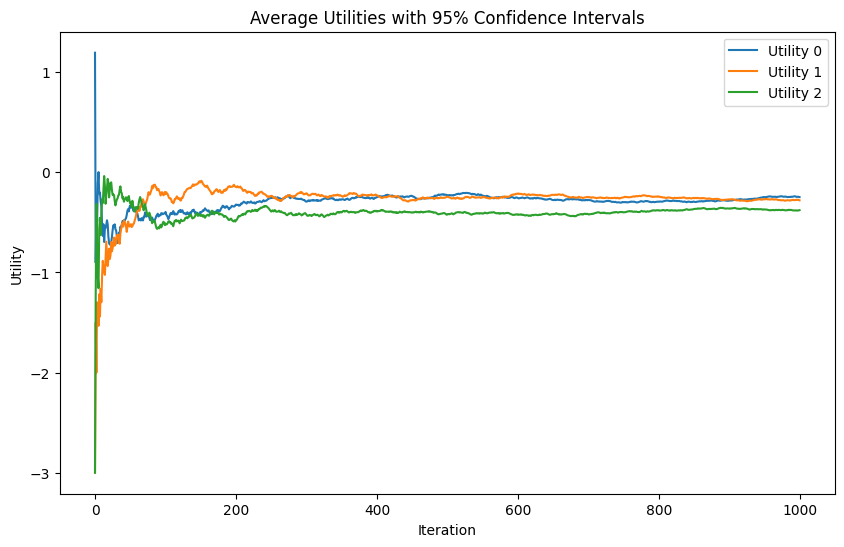

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

# Calculate mean and standard error across experiments (axis=0)
mean_utilities = experiment_utilites.mean(axis=0)
stderr_utilities = sem(experiment_utilites, axis=0)

# Plot mean with confidence interval (mean ± 1.96*stderr for ~95% CI)
df_mean = pd.DataFrame(mean_utilities)
df_stderr = pd.DataFrame(stderr_utilities)

plt.figure(figsize=(10, 6))
for col in df_mean.columns:
    plt.plot(df_mean.index, df_mean[col], label=f'Utility {col}')
    plt.fill_between(
        df_mean.index,
        df_mean[col] - 1.96 * df_stderr[col]/experiments,
        df_mean[col] + 1.96 * df_stderr[col]/experiments,
        alpha=0.2
    )

plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title('Average Utilities with 95% Confidence Intervals')
plt.legend()
plt.show()